NN FROM  SCRATCH


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average Accuracy: 0.33454616588419406
Confusion Matrix:
[[239   0]
 [475   0]]
Precision: [0.33473389 0.        ]
Recall: [1. 0.]
Squared Error: 0.665266106442577


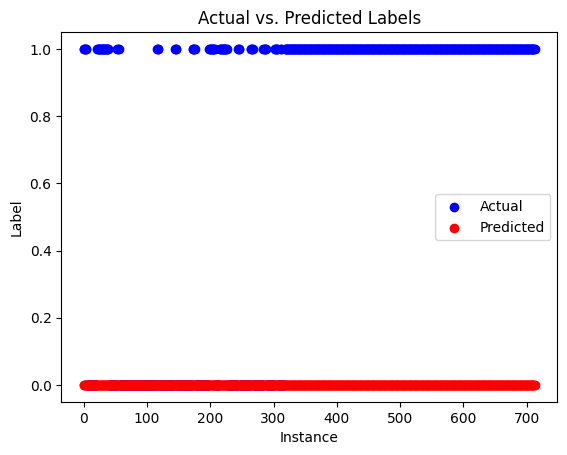

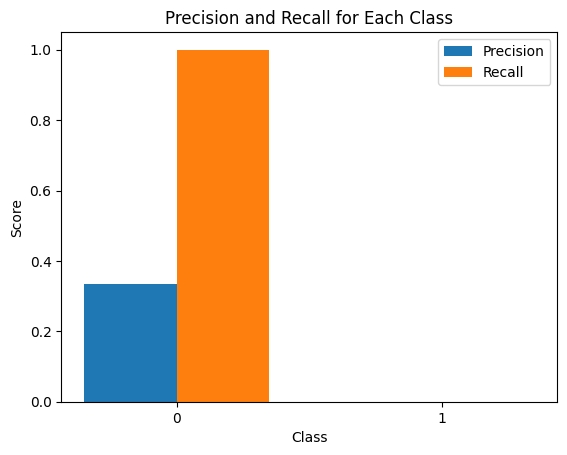

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('nn_02(updated).csv')

# Separate the features (X) and the target variable (y)
X = data.drop('label', axis=1).values
y = data['label'].values

# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the neural network architecture
class NeuralNetwork:
    def __init__(self, input_dim, hidden_layers, neurons_per_layer):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.neurons_per_layer = neurons_per_layer
        self.weights = []
        self.biases = []

    def initialize_parameters(self):
        np.random.seed(42)
        layer_dims = [self.input_dim] + self.neurons_per_layer

        for i in range(1, len(layer_dims)):
            prev_dim = layer_dims[i-1]
            current_dim = layer_dims[i]
            self.weights.append(np.random.randn(prev_dim, current_dim))
            self.biases.append(np.zeros((1, current_dim)))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward_propagation(self, X):
        A = X
        for i in range(len(self.hidden_layers)):
            Z = np.dot(A, self.weights[i]) + self.biases[i]
            A = self.sigmoid(Z)
        Z = np.dot(A, self.weights[-1]) + self.biases[-1]
        A = self.sigmoid(Z)
        return A

    def predict(self, X):
        A = self.forward_propagation(X)
        predictions = np.argmax(A, axis=1)  # Assuming one-hot encoded labels
        return predictions

# Perform k-fold cross-validation
num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
predicted_states = []
true_states = []

hidden_layers = [10, 5]  # Example: 2 hidden layers with 10 and 5 neurons
num_classes = 2  # Update this value based on the number of classes in your dataset
neurons_per_layer = hidden_layers + [num_classes]  # Output layer with `num_classes` neurons

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and train the neural network
    input_dim = X_train.shape[1]
    neural_network = NeuralNetwork(input_dim, hidden_layers, neurons_per_layer)
    neural_network.initialize_parameters()
    A_train = neural_network.forward_propagation(X_train)
    predictions_train = neural_network.predict(X_train)

    # Make predictions on the test set
    predictions_test = neural_network.predict(X_test)

    # Calculate accuracy
    accuracy_train = accuracy_score(y_train, predictions_train)
    accuracy_test = accuracy_score(y_test, predictions_test)
    accuracy_scores.append(accuracy_test)

    # Save predicted states and true states
    predicted_states.extend(predictions_test)
    true_states.extend(y_test)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(true_states, predicted_states)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate precision and recall
precision = precision_score(true_states, predicted_states, average=None)
recall = recall_score(true_states, predicted_states, average=None)
print("Precision:", precision)
print("Recall:", recall)

# Calculate squared error
squared_error = mean_squared_error(true_states, predicted_states)
print("Squared Error:", squared_error)

# Visualize predicted vs. actual labels
plt.scatter(range(len(y)), y, color='b', label='Actual')
plt.scatter(range(len(predicted_states)), predicted_states, color='r', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

# Visualize precision and recall
classes = np.unique(y)
x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, precision, width, label='Precision')
rects2 = ax.bar(x + width/2, recall, width, label='Recall')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Precision and Recall for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()

NN USING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Load the CSV file
data = pd.read_csv('nn_02(updated).csv')

# Separate the features (X) and the target variable (y)
X = data.drop('label', axis=1)
y = data['label']

# Perform standardization on the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the neural network architecture
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Perform k-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
predicted_states = []

for train_index, test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test set
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    # Save predicted states
    predicted_states.extend(y_pred)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", avg_accuracy)

# Visualize predicted vs. actual labels
plt.scatter(range(len(y)), y, color='b', label='Actual')
plt.scatter(range(len(predicted_states)), predicted_states, color='r', label='Predicted')
plt.xlabel('Instance')
plt.ylabel('Label')
plt.title('Actual vs. Predicted Labels')
plt.legend()
plt.show()

# Add predicted state column to the DataFrame
data['predicted_state'] = predicted_states

# Save the updated DataFrame to a new CSV file
data.to_csv('nn_02_pred_using_NN.csv', index=False)


FileNotFoundError: ignored